<a href="https://colab.research.google.com/github/marcelopaludetto/edutech-2021/blob/main/analise-dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extraindo informações do Edutech

In [39]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [40]:
filenames = [f'https://raw.githubusercontent.com/marcelopaludetto/edutech-2021/main/data/dados{i}.csv' for i in range(35)]           
dados = [pd.read_csv(i) for i in filenames] 
N = len(dados)

# Retirando turmas duplicadas
Estudantes do ano passado que estavam em outras trilhas

In [41]:
for j in range(N):
  index = dados[j].turmaTrilha.str.find(',') > 0
  for i in range(index.count()):
    if (index[i] == True):
      dados[j].turmaTrilha[i] = dados[j].turmaTrilha[i].split(',')[1]

In [42]:
renomear = {'data' : 'data',
            'data de último acesso' : 'data_ultimo_acesso',
            'id' : 'id',
            'turmaTrilha':'turmaTrilha',
            'atividadesFeitas':'atividadesFeitas',
            'atividadesCorretas':'atividadesCorretas',
            'atividadesGerais': 'atividadesGerais'}
for f in range(N):
  dados[f] = dados[f].rename(columns=renomear)

# Número de estudantes no Edutech

In [43]:
EstudantesEdutech = [];
for f in range(N):
  print('Na {} semana, estudantes = {}'.format(f+1,dados[f].data.count()))
  EstudantesEdutech.append(dados[f].data.count())

Na 1 semana, estudantes = 67487
Na 2 semana, estudantes = 67487
Na 3 semana, estudantes = 67487
Na 4 semana, estudantes = 67487
Na 5 semana, estudantes = 67488
Na 6 semana, estudantes = 67745
Na 7 semana, estudantes = 70776
Na 8 semana, estudantes = 70842
Na 9 semana, estudantes = 47923
Na 10 semana, estudantes = 48010
Na 11 semana, estudantes = 48008
Na 12 semana, estudantes = 48511
Na 13 semana, estudantes = 48512
Na 14 semana, estudantes = 48719
Na 15 semana, estudantes = 46581
Na 16 semana, estudantes = 46704
Na 17 semana, estudantes = 46668
Na 18 semana, estudantes = 34791
Na 19 semana, estudantes = 38232
Na 20 semana, estudantes = 40717
Na 21 semana, estudantes = 41896
Na 22 semana, estudantes = 41902
Na 23 semana, estudantes = 42268
Na 24 semana, estudantes = 42548
Na 25 semana, estudantes = 42668
Na 26 semana, estudantes = 42415
Na 27 semana, estudantes = 42579
Na 28 semana, estudantes = 42782
Na 29 semana, estudantes = 42782
Na 30 semana, estudantes = 42780
Na 31 semana, estud

In [44]:
print('Na semana {} foram incluidos {} estudantes no programa Edutech'.format(7,
                                                                              dados[6].data.count() - dados[5].data.count()))

Na semana 7 foram incluidos 3031 estudantes no programa Edutech


In [45]:
print('Na 9 semana, foram excluídos {} estudantes do programa Edutech'.format(dados[7].data.count() - dados[8].data.count()))

Na 9 semana, foram excluídos 22919 estudantes do programa Edutech


# Criar dias da semana no último acesso

In [46]:
for i in range(N):
  dia_da_semana = [];
  for f in range(dados[i].data_ultimo_acesso.count()):
      temp = pd.Timestamp(dados[i].data_ultimo_acesso[f])
      dia_da_semana.append(temp.day_name())
  dados[i]['dia_da_semana'] = dia_da_semana
  

## Traduzir os dias da semana

In [47]:
renomear_dia = {
    'Wednesday' : 'Quarta',
    'Thursday' : 'Quinta',
    'Monday' : 'Segunda',
    'Sunday' : 'Domingo',
    'Saturday' : 'Sabado',
    'Tuesday' : 'Terca',
    'Friday' : 'Sexta'
}
for i in range(N):
  dados[i].dia_da_semana = dados[i].dia_da_semana.map(renomear_dia)

## Coletando o número de alunos ativos

In [80]:
for i in range(N):
  print(dados[i][dados[i]['atividadesGerais'].notnull()].data.count())
  # print('Na {} semana, o número de estudantes ativos no Edutech é de {}'.format(i+1,dados[i][dados[i]['atividadesGerais'].notnull()].data.count()))

6358
6619
6664
6696
6485
6879
5592
6439
6538
6352
5395
4297
1401
3676
5321
5499
5457
5424
5689
6254
5367
6964
7349
7581
7520
5011
7610
7216
5553
7192
5542
5930
4678
3178
1851


In [81]:
for i in range(N):
 print((dados[i][dados[i]['atividadesGerais'].notnull()].data.count()/dados[i].data.count()*100).round(2))
 
 # print('Na semana {} tivemos {} % de estudantes ativos.'.format(i+1,(dados[i][dados[i]['atividadesGerais'].notnull()].data.count()/dados[i].data.count()*100).round(2)))


9.42
9.81
9.87
9.92
9.61
10.15
7.9
9.09
13.64
13.23
11.24
8.86
2.89
7.55
11.42
11.77
11.69
15.59
14.88
15.36
12.81
16.62
17.39
17.82
17.62
11.81
17.87
16.87
12.98
16.81
12.8
13.69
10.8
7.34
4.27


# Classificar os estudantes em trilhas


In [50]:
for i in range(N):
  dados[i].turmaTrilha.replace('\xa0','')

crtl + shift + L

In [51]:
trilha = {
    '11' : 'Games1',
    '12' : 'Games2' ,   
    '21' : 'FrontEnd',
    '22' : 'Mobile',
    '23' : 'DataScience',
    '24' : 'Java',
    '25' : 'Python',
    '16' : 'ETI',
    '17' : 'ETI'
}

In [52]:
for j in range(N):
  index = dados[j]['turmaTrilha'].astype(str).str[:2]
  dados[j]['Trilha'] = index
  dados[j].Trilha = dados[j].Trilha.map(trilha)

In [82]:
for j in range(N):
  print(dados[j].Trilha.value_counts())

ETI            18772
Games1         15126
Games2         13265
FrontEnd        7475
Mobile          4341
Python          3586
Java            2429
DataScience     1847
Name: Trilha, dtype: int64
ETI            18772
Games1         15126
Games2         13265
FrontEnd        7475
Mobile          4341
Python          3586
Java            2429
DataScience     1847
Name: Trilha, dtype: int64
ETI            19220
Games1         15125
Games2         13265
FrontEnd        7475
Mobile          4346
Python          3586
Java            2429
DataScience     1850
Name: Trilha, dtype: int64
ETI            19347
Games1         15125
Games2         13265
FrontEnd        7406
Mobile          4346
Python          3586
Java            2429
DataScience     1850
Name: Trilha, dtype: int64
ETI            19348
Games1         15125
Games2         13265
FrontEnd        7406
Mobile          4346
Python          3586
Java            2429
DataScience     1850
Name: Trilha, dtype: int64
ETI            19671
Game

# Analisando o número de atividades feitas por semana

In [54]:
alunosAtivosDaSemana = [];
for i in range(N):
  alunosAtivosDaSemana.append(dados[i].query("atividadesGerais > 0"))

In [55]:
for i in range(N):
  print('Na semana {} foram realidas {} atividades'.format(i+1,sum(alunosAtivosDaSemana[i].atividadesFeitas)))

Na semana 1 foram realidas 28573 atividades
Na semana 2 foram realidas 30411 atividades
Na semana 3 foram realidas 32140 atividades
Na semana 4 foram realidas 36710 atividades
Na semana 5 foram realidas 32696 atividades
Na semana 6 foram realidas 35833 atividades
Na semana 7 foram realidas 27989 atividades
Na semana 8 foram realidas 32763 atividades
Na semana 9 foram realidas 31950 atividades
Na semana 10 foram realidas 30279 atividades
Na semana 11 foram realidas 25463 atividades
Na semana 12 foram realidas 21533 atividades
Na semana 13 foram realidas 7809 atividades
Na semana 14 foram realidas 18009 atividades
Na semana 15 foram realidas 27738 atividades
Na semana 16 foram realidas 29051 atividades
Na semana 17 foram realidas 29636 atividades
Na semana 18 foram realidas 33382 atividades
Na semana 19 foram realidas 36146 atividades
Na semana 20 foram realidas 42321 atividades
Na semana 21 foram realidas 37718 atividades
Na semana 22 foram realidas 52312 atividades
Na semana 23 foram r

In [56]:
grafico = [];
for i in range(N):
  grafico.append(sum(alunosAtivosDaSemana[i].atividadesFeitas))

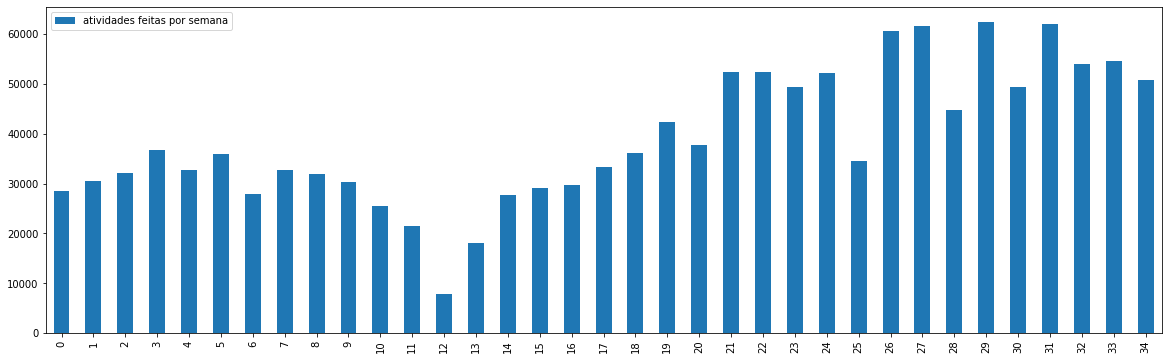

In [57]:
grafico1 = pd.DataFrame({'atividades feitas por semana' : grafico})
grafico1.head()
grafico1.plot(kind ='bar',figsize = (20,6))

In [77]:
grafico

[28573,
 30411,
 32140,
 36710,
 32696,
 35833,
 27989,
 32763,
 31950,
 30279,
 25463,
 21533,
 7809,
 18009,
 27738,
 29051,
 29636,
 33382,
 36146,
 42321,
 37718,
 52312,
 52399,
 49431,
 52122,
 34580,
 60567,
 61564,
 44778,
 62314,
 49288,
 61902,
 53926,
 54540,
 50680]

# Número de estudantes ativos no Edutech

In [58]:
alunosAtivosDaSemana[1].data.count()

6619

# Média de atividades realizadas por alunos de cada Trilha por Semana

In [59]:
alunos_semana = pd.DataFrame({'ETI':[alunosAtivosDaSemana[i].query("Trilha == 'ETI'").data.count() for i in range(N)],
              'Games1':[alunosAtivosDaSemana[i].query("Trilha == 'Games1'").data.count() for i in range(N)],
              'Games2': [alunosAtivosDaSemana[i].query("Trilha == 'Games2'").data.count() for i in range(N)],
              'FrontEnd':[alunosAtivosDaSemana[i].query("Trilha == 'FrontEnd'").data.count() for i in range(N)],
              'Mobile': [alunosAtivosDaSemana[i].query("Trilha == 'Mobile'").data.count() for i in range(N)],
              'DataScience': [alunosAtivosDaSemana[i].query("Trilha == 'DataScience'").data.count() for i in range(N)],
              'Java': [alunosAtivosDaSemana[i].query("Trilha == 'Java'").data.count() for i in range(N)],
              'Python': [alunosAtivosDaSemana[i].query("Trilha == 'Python'").data.count() for i in range(N)]})
alunos_semana.head()

,ETI,Games1,Games2,FrontEnd,Mobile,DataScience,Java,Python
0,148,2076,1626,1021,440,240,368,438
1,266,2198,1621,1039,442,238,381,433
2,347,2231,1534,1041,450,241,392,428
3,562,2096,1529,1003,436,234,372,453
4,917,1984,1357,901,383,207,331,395


In [60]:
dados[26].groupby('Trilha').mean().atividadesGerais.sort_values()

Trilha
Mobile         22.446237
Java           22.655172
FrontEnd       23.292052
DataScience    25.752475
Python         26.338983
Games1         32.253227
Games2         34.319672
ETI            36.607075
Name: atividadesGerais, dtype: float64

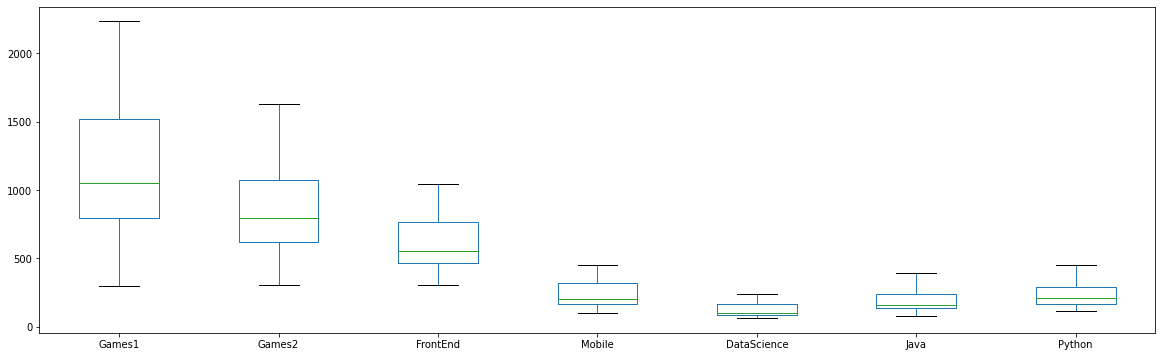

In [61]:
alunos_semana.iloc[:,1:].plot(kind = 'box',
           figsize = (20,6))

# Gráficos

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

Gráfico01 - Número de estudantes inscritos no Edutech por semana

In [63]:
alunosETI = [];
alunosGames1 = [];
alunosGames2 = [];
alunosFrontEnd = [];
alunosMobile = [];
alunosDataScience = [];
alunosJava = [];
alunosPython = [];
for i in range(N):
  alunosETI.append(dados[i].query('Trilha == "ETI"').atividadesGerais.count())
  alunosGames1.append(dados[i].query('Trilha == "Games1"').atividadesGerais.count())
  alunosGames2.append(dados[i].query('Trilha == "Games2"').atividadesGerais.count())
  alunosFrontEnd.append(dados[i].query('Trilha == "FrontEnd"').atividadesGerais.count())
  alunosMobile.append(dados[i].query('Trilha == "Mobile"').atividadesGerais.count())
  alunosDataScience.append(dados[i].query('Trilha == "DataScience"').atividadesGerais.count())
  alunosJava.append(dados[i].query('Trilha == "Java"').atividadesGerais.count())
  alunosPython.append(dados[i].query('Trilha == "Python"').atividadesGerais.count())


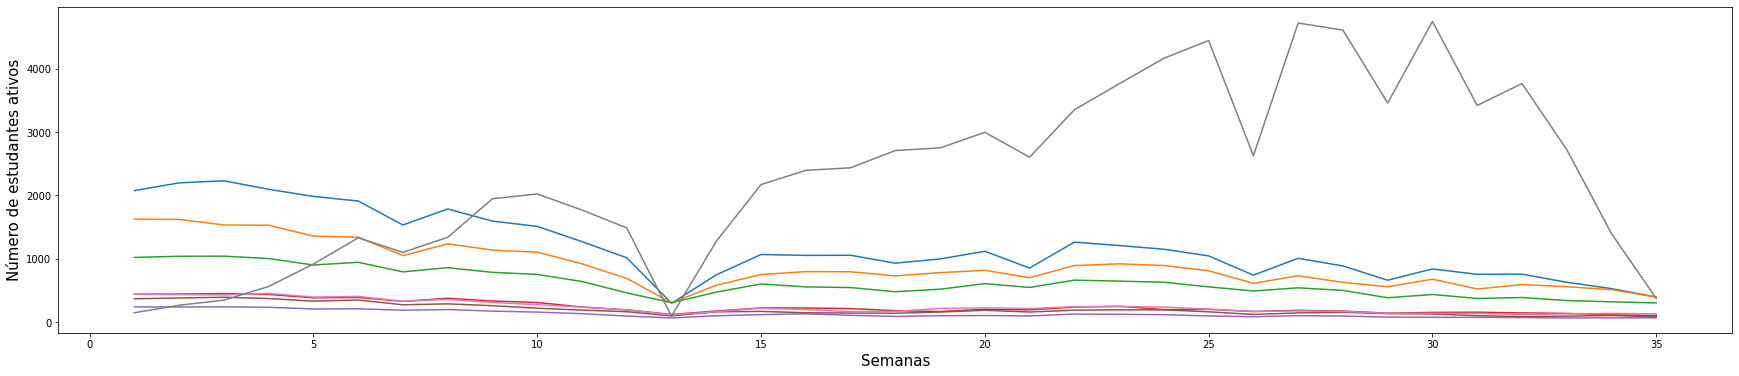

In [64]:
t = list(range(1,N+1))
plt.figure(figsize=(30,6))
plt.plot(t, alunosGames1, t, alunosGames2, t, alunosFrontEnd, t, alunosMobile, t, alunosDataScience, t, alunosJava, t, alunosPython, t, alunosETI)
plt.xlabel('Semanas', fontsize=15)
plt.ylabel('Número de estudantes ativos', fontsize = 15)

plt.show()

In [83]:
alunosETI

[148,
 266,
 347,
 562,
 917,
 1330,
 1101,
 1339,
 1948,
 2023,
 1769,
 1486,
 95,
 1275,
 2171,
 2396,
 2436,
 2709,
 2750,
 2996,
 2603,
 3352,
 3761,
 4165,
 4445,
 2626,
 4721,
 4610,
 3458,
 4746,
 3420,
 3766,
 2725,
 1397,
 374]

In [65]:
import numpy as np

In [66]:
alunosEdutech = [];
alunosEdutech = np.sum((alunosGames1, alunosGames2, alunosFrontEnd, alunosMobile, alunosDataScience, alunosJava, alunosPython),axis=0)

alunosEdutech

array([6209, 6352, 6317, 6123, 5558, 5549, 4491, 5100, 4590, 4329, 3626,
       2811, 1306, 2401, 3150, 3103, 3021, 2715, 2939, 3258, 2764, 3612,
       3588, 3416, 3075, 2385, 2889, 2605, 2094, 2445, 2121, 2163, 1953,
       1781, 1477])

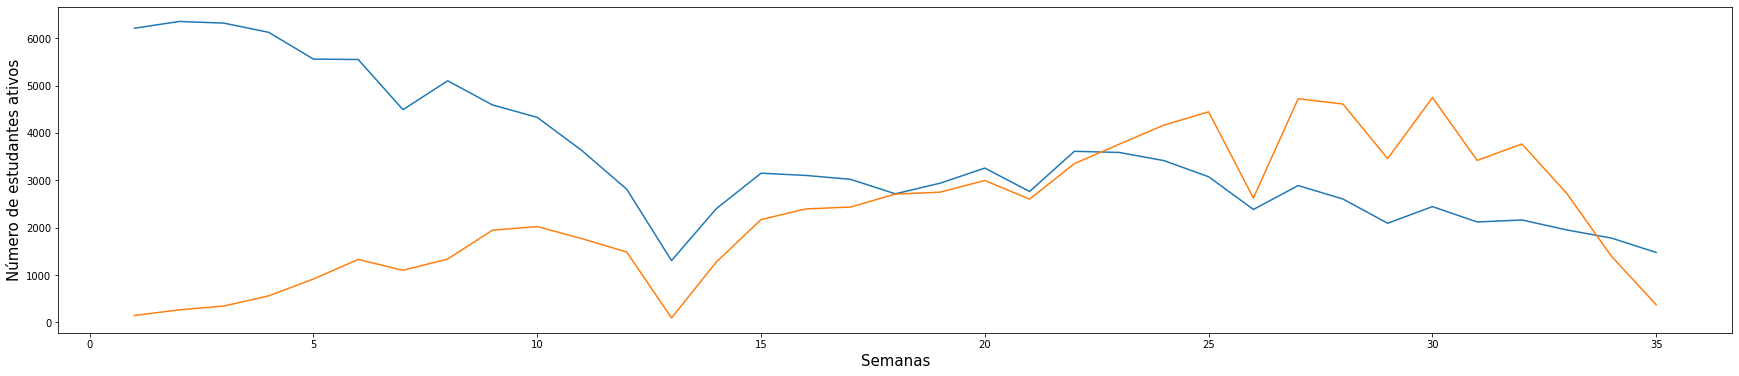

In [67]:
t = list(range(1,N+1))
plt.figure(figsize=(30,6))
plt.plot(t, alunosEdutech, t , alunosETI)
plt.xlabel('Semanas', fontsize=15)
plt.ylabel('Número de estudantes ativos', fontsize = 15)

plt.show()

In [68]:
alunosAtivosDaSemana[25].dia_da_semana.value_counts().index

Index(['Sexta', 'Quarta', 'Quinta', 'Domingo', 'Sabado', 'Segunda', 'Terca'], dtype='object')

# Qual é o dia da semana em que os alunos mais estudam?
https://cursos.alura.com.br/course/data-science-primeiros-passos/task/49685

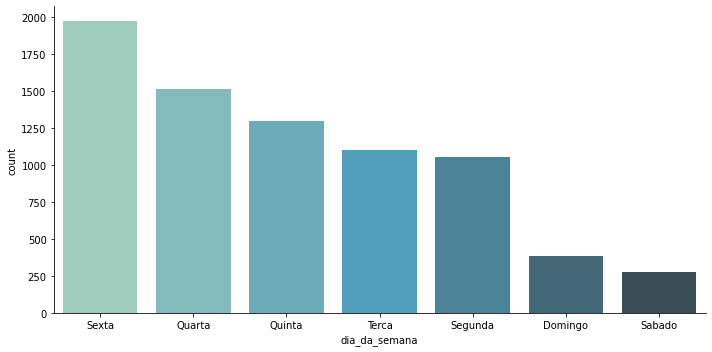

In [69]:
i=26
sns.catplot(x = "dia_da_semana", data = alunosAtivosDaSemana[i], 
            kind="count",
            aspect=2,
            palette="GnBu_d",
            order = alunosAtivosDaSemana[i].dia_da_semana.value_counts().index)

# Qual é o melhor dia da semana para estudar (Games1)

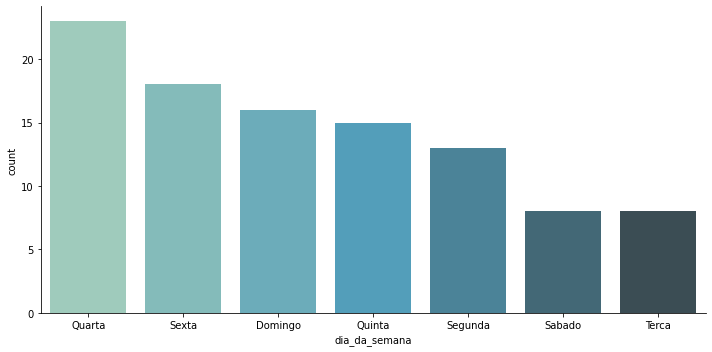

In [70]:
i=26
sns.catplot(x = "dia_da_semana", data = alunosAtivosDaSemana[i].query('Trilha == "DataScience"'), 
            kind="count",
            aspect=2,
            palette="GnBu_d",
            order = alunosAtivosDaSemana[i].query('Trilha == "DataScience"').dia_da_semana.value_counts().index)

# Qual é o melhor dia para estudar (geral)

In [71]:
new_df = pd.concat(([alunosAtivosDaSemana[i].query('Trilha == "Games2"') for i in range(N)]))

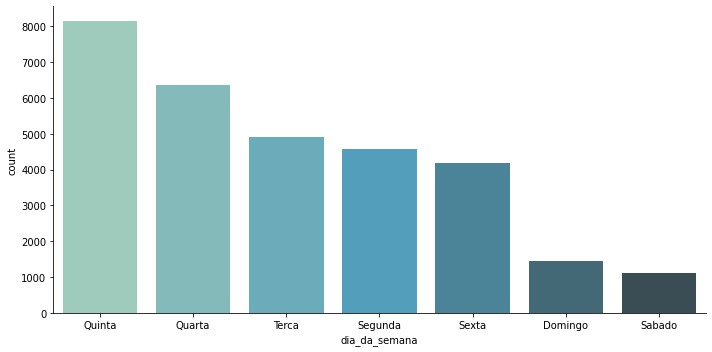

In [72]:
sns.catplot(x = "dia_da_semana", data = new_df, 
            kind="count",
            aspect=2,
            palette="GnBu_d",
            order = new_df.dia_da_semana.value_counts().index)

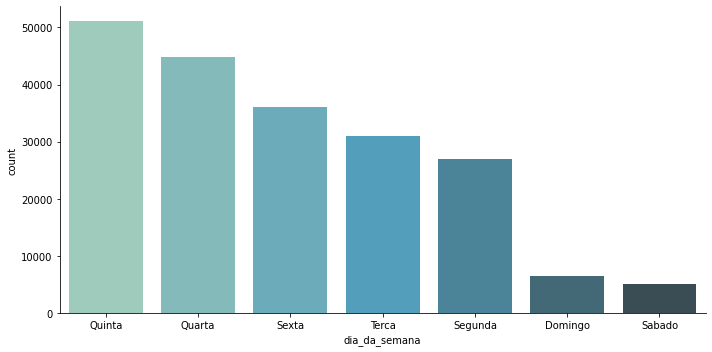

In [73]:
tudoDia = pd.concat(([alunosAtivosDaSemana[i] for i in range(N)]))
sns.catplot(x = "dia_da_semana", data = tudoDia, 
            kind="count",
            aspect=2,
            palette="GnBu_d",
            order = tudoDia.dia_da_semana.value_counts().index)

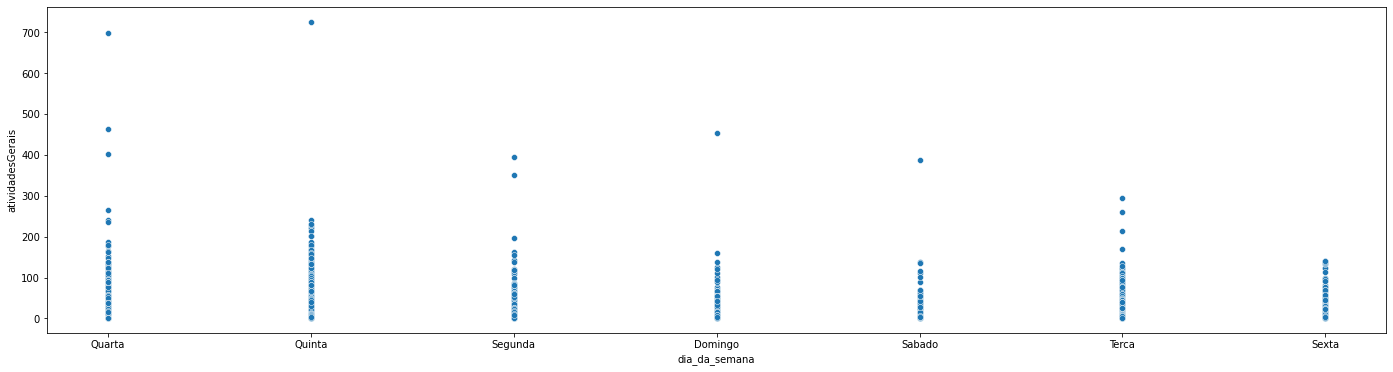

In [74]:
plt = sns.scatterplot(x='dia_da_semana',y='atividadesGerais', data=alunosAtivosDaSemana[1])
plt.figure.set_size_inches(24,6)

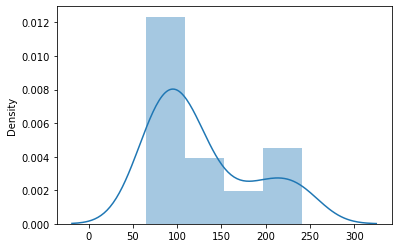

In [75]:
sns.distplot(alunosDataScience)


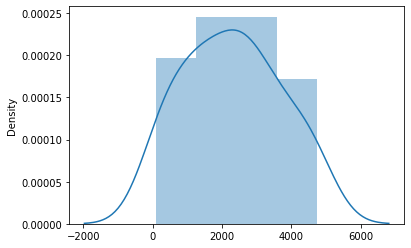

In [76]:
sns.distplot(alunosETI)
